In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
import warnings
from sklearn import metrics
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

sns.set(style='white', context='notebook', palette='deep')

In [2]:
data = pd.read_csv("data.csv")
data.head()

,Braking Time,Kinetic Energy Dissipated,Braking Power,Initial Temperature (rotor),Final Temperature (rotor),Initial Vehicle Speed,Deceleration rate,Nominal Contact pressure,Final Vechicle Speed,PN10,...,PN2.5,PN1,PM 10,PM2.5,PM1,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,6,24796.87500,4132.812500,23.3,24.8,20.70,0.958333,0.357144,0.00,157.000,...,2826218.056,2721333.334,0.007264,0.002292,0.000623,0.010179,1.038542,4.366394e+09,NaN,3.168841
1,7,29078.33333,4154.047619,24.4,26.5,23.10,0.695238,0.297705,5.58,139.080,...,2503633.167,2410720.001,0.006435,0.002031,0.000552,0.009018,1.038542,4.366392e+09,NaN,3.168841
2,4,12548.07870,3137.019676,26.9,28.0,15.38,0.759722,0.343821,4.44,77.680,...,1398347.889,1346453.334,0.003594,0.001134,0.000308,0.005037,1.038542,4.366385e+09,NaN,3.168842
3,6,35325.18519,5887.530864,27.6,30.2,25.74,0.857407,0.336648,7.22,156.948,...,2825281.984,2720432.001,0.007261,0.002292,0.000623,0.010176,1.038542,4.366391e+09,NaN,3.168842
4,3,19386.38889,6462.129630,30.1,31.4,24.77,0.748148,0.317689,16.69,140.732,...,2533371.462,2439354.667,0.006511,0.002055,0.000559,0.009125,1.038542,4.366392e+09,NaN,3.168841


ValueError: autodetected range of [nan, nan] is not finite

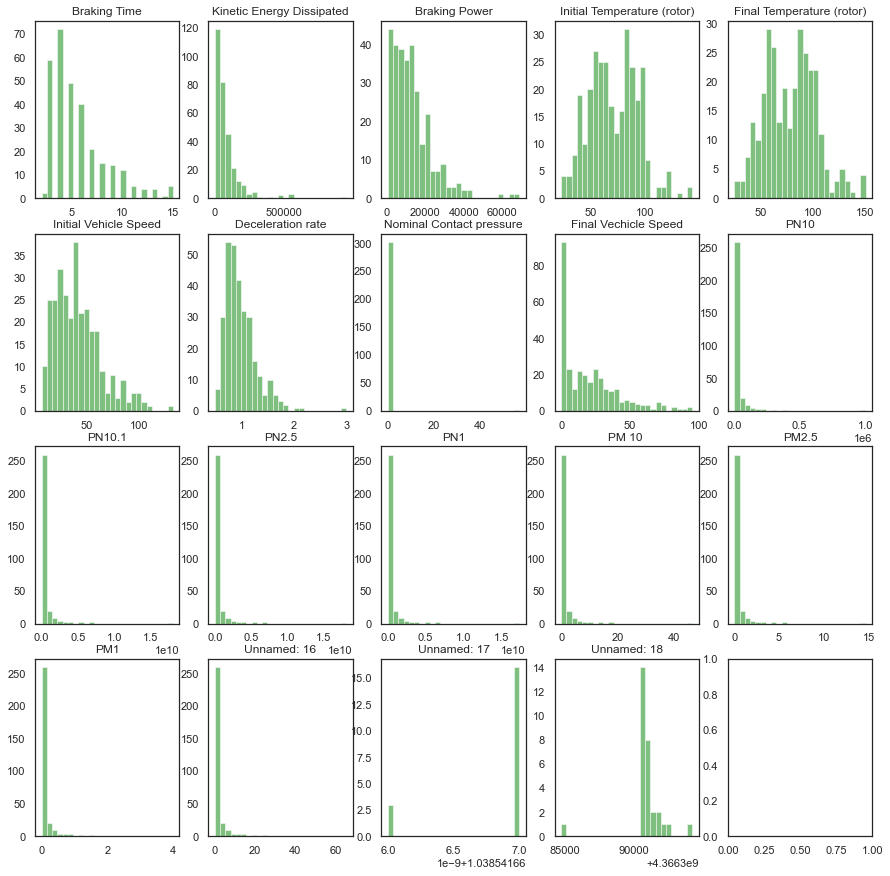

In [3]:
plt.figure(figsize=(15,15))
for ii,name in enumerate(data.columns):
    plt.subplot(4,5,ii+1)
    plt.hist(data.iloc[:,ii],25,color="green",alpha = 0.5)
    plt.title(name)

plt.subplots_adjust()
plt.show()

In [4]:
def multiplot(data,features,plottype,nrows,ncols,figsize,y=None,colorize=False):
    """ This function draw a multi plot for 3 types of plots ["regplot","distplot","coutplot"]"""
    n = 0
    plt.figure(1)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    
    if colorize:
        colors = sns.color_palette(n_colors=(nrows*ncols))
    else :
        colors = [None]*(nrows*ncols)
        
    for row in range(ncols):
        for col in range(nrows):
            
            if plottype == 'regplot':
                if y == None:
                    raise ValueError('y value is needed with regplot type')
                
                sns.regplot(data = data, x = features[n], y = y ,ax=axes[row,col], color = colors[n])
                correlation = np.corrcoef(data[features[n]],data[y])[0,1]
                axes[row,col].set_title("Correlation {:.2f}".format(correlation))
            
            elif plottype == 'distplot':
                sns.distplot(a = data[features[n]],ax = axes[row,col],color=colors[n])
                skewness = data[features[n]].skew()
                axes[row,col].legend(["Skew : {:.2f}".format(skewness)])
            
            elif plottype in ['countplot']:
                g = sns.countplot(x = data[features[n]], y = y, ax = axes[row,col],color = colors[n])
                g = plt.setp(g.get_xticklabels(), rotation=45)
                
            n += 1
    plt.tight_layout()
    plt.show()
    plt.gcf().clear()

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

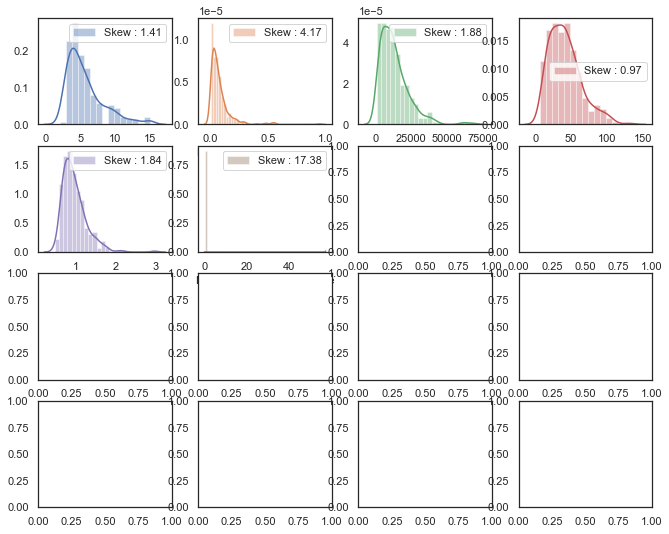

In [5]:
skewed_features =['Braking Time','Kinetic Energy Dissipated','Braking Power','Initial Vehicle Speed','Deceleration rate','Nominal Contact pressure']

multiplot(data = data,features = skewed_features,plottype = "distplot",
          nrows = 4, ncols = 4, figsize = (11,9), colorize = True)

In [6]:
dataX = data.iloc[:,0:9]
dataY = data[['PM2.5']]


In [7]:
scale = StandardScaler(with_mean=True,with_std=True)
dataXST = scale.fit_transform(dataX)
dataXST = pd.DataFrame(dataXS, columns=dataX.columns)
plt.hist((dataXST['Deceleration rate']))

NameError: name 'dataXS' is not defined

In [ ]:
multiplot(data = dataXST,features = dataXST.columns,plottype = "distplot",
          nrows = 4, ncols = 4, figsize = (11,9), colorize = True)

In [ ]:
dataX.c

IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

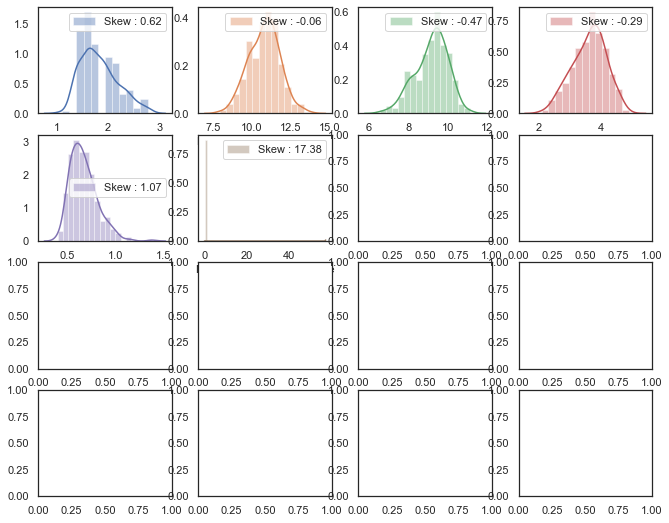

In [48]:
multiplot(data = dataX,features = skewed_features,plottype = "distplot",
          nrows = 4, ncols = 4, figsize = (11,9), colorize = True)

In [ ]:
multiplot(data = dataXS,features=dataXS.columns,plottype = "distplot",
          nrows = 4, ncols = 4, figsize = (11,9), colorize = True)

In [ ]:
plt.hist(np.log1p(data['Final Vechicle Speed']))

In [8]:
# remove the skeness by log1p and then minmax scale it for LN
dataXS = dataX
dataXS['Braking Time'] = np.log1p(dataX['Braking Time'])
dataXS['Kinetic Energy Dissipated'] = np.log1p(dataX['Kinetic Energy Dissipated'])
dataXS['Braking Power'] = np.log1p(dataX['Braking Power'])
dataXS['Initial Vehicle Speed'] = np.log1p(dataX['Initial Vehicle Speed'])
dataXS['Final Vechicle Speed'] = np.log1p(dataX['Final Vechicle Speed'])
dataXS['Deceleration rate'] = np.log1p(dataX['Deceleration rate'])

scale = MinMaxScaler()
dataXS = scale.fit_transform(dataXS)

dataXS

array([[0.50615877, 0.37207479, 0.38419076, ..., 0.27829515, 0.00424267,
        0.        ],
       [0.58592775, 0.39951538, 0.38531352, ..., 0.13204601, 0.00319777,
        0.4124056 ],
       [0.305157  , 0.25472625, 0.32379737, ..., 0.16989077, 0.00400847,
        0.3707596 ],
       ...,
       [0.58592775, 0.61229284, 0.65590336, ..., 0.28137168, 0.0042787 ,
        0.69927796],
       [0.50615877, 0.59342488, 0.66568384, ..., 0.31593156, 0.00410756,
        0.70079775],
       [0.58592775, 0.57746447, 0.6116097 , ..., 0.52213346, 0.00557583,
        0.        ]])

In [9]:
plt.hist(np.log1p(dataXS['Deceleration rate']))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [10]:
# model
lassocv = LassoCV(eps=1e-7,cv=5) 
ridge = Ridge(alpha=1e-6) 
lassolarscv = LassoLarsCV(cv=5)
elasticnetcv = ElasticNetCV(eps=1e-15,cv=5)

# Regression linear models (Lasso, Ridge, Elasticnet)
def RMSE(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(dataXS,dataY.values,test_size = 0.25,random_state = 2)

In [12]:
RMSE(lassocv, dataXS, dataY)

9.219920734548573

In [13]:
RMSE(elasticnetcv, dataXS, dataY)

9.271710425027411

In [14]:
RMSE(ridge, dataXS, dataY)

9.428287565764588

In [15]:
RMSE(lassolarscv,dataXS, dataY)

9.221817029777867

In [17]:
lassocv.fit(X_train,Y_train)
ridge.fit(X_train,Y_train)
lassolarscv.fit(X_train,Y_train)
elasticnetcv.fit(X_train,Y_train)

ElasticNetCV(cv=5, eps=1e-15)

In [18]:
features = dataX.columns
print("ElasticNetCV regression has conserved %d features over %d"%(len(features[elasticnetcv.coef_!=0]),X_train.shape[1]))
print("LassoCV regression has conserved %d features over %d"%(len(features[lassocv.coef_!=0]),X_train.shape[1]))
print("Ridge regression has conserved %d features over %d"%(len(features[(ridge.coef_!=0)[0]]),X_train.shape[1]))
print("LassoLarsCV regression has conserved %d features over %d"%(len(features[lassolarscv.coef_!=0]),X_train.shape[1]))


ElasticNetCV regression has conserved 8 features over 9
LassoCV regression has conserved 7 features over 9
Ridge regression has conserved 9 features over 9
LassoLarsCV regression has conserved 3 features over 9


In [19]:
lassocv.coef_

array([  0.        ,  -1.49120953,  -1.91480638, -11.66999375,
        13.40127203,   1.64763475,  -0.29963156,   0.        ,
         0.06164072])

In [42]:
results = pd.DataFrame(data=[lassocv.coef_, ridge.coef_[0], lassolarscv.coef_, elasticnetcv.coef_])
results.to_csv('results.csv')

In [45]:
elasticnetcv.intercept_

-0.013041839899053831

In [24]:
dataX.columns

Index(['Braking Time', 'Kinetic Energy Dissipated', 'Braking Power',
       'Initial Temperature (rotor)', 'Final Temperature (rotor)',
       'Initial Vehicle Speed', 'Deceleration rate',
       'Nominal Contact pressure', 'Final Vechicle Speed'],
      dtype='object')

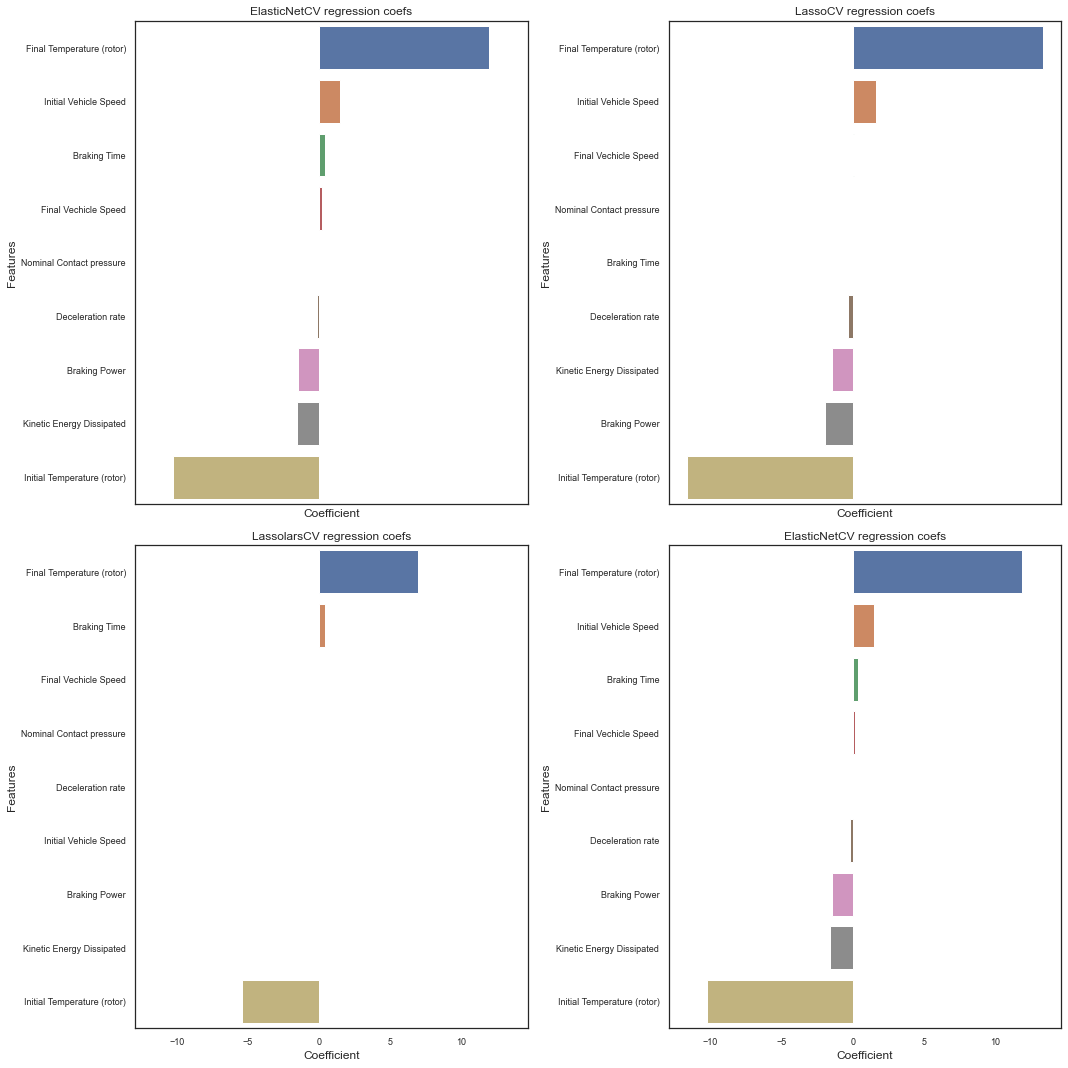

<Figure size 432x288 with 0 Axes>

In [21]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_regressors = [("LassoCV", lassocv),("LassolarsCV",lassolarscv),("ElasticNetCV",elasticnetcv)]

nregressors = -1
for row in range(nrows):
    for col in range(ncols):
        name = names_regressors[nregressors][0]
        regressor = names_regressors[nregressors][1]
        indices = np.argsort(regressor.coef_)[::-1][:10]
        g = sns.barplot(y=features[indices][:10],x = regressor.coef_[indices][:10] , orient='h',ax=axes[row][col])
        g.set_xlabel("Coefficient",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " regression coefs")
        nregressors += 1
plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
Y_pred_lassocv = lassocv.predict(X_test)
Y_pred_lassolarscv = lassolarscv.predict(X_test)
Y_pred_elasticnetcv = elasticnetcv.predict(X_test)


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



#开始画图

plt.title('Result Analysis')
plt.plot( Y_test, color='green', label='real y')
plt.plot( Y_pred_lassocv, color='red', label='lasso y')
plt.plot( Y_pred_lassolarscv,  color='skyblue', label='lassolarse y')
plt.plot( Y_pred_elasticnetcv, color='blue', label='elasticnet y')
plt.legend() # 显示图例


plt.ylabel('pm 2.5')
plt.show()
#python 一个折线图绘制多个曲线


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_predict
est =[lassocv,ridge,lassolarscv,elasticnetcv]


score = cross_validate(est[0], X_train, Y_train,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=4)


In [ ]:
cv_results = cross_val_score(lassocv,X_train,Y_train,cv=5,scoring="r2",n_jobs=4)
cv_results.mean()

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict


def plot_regression_results(ax, y_true, y_pred, title, scores):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title 
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    start_time = time.time()
    score = cross_validate(est, X, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Single predictors versus stacked predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1)

RMSE(model_xgb,X_train,Y_train)

In [ ]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
RMSE(GBoost,X_train,Y_train)


In [ ]:

GBoost.fit(dataXS,dataY)
Y_pred_GBoost = np.expm1(GBoost.predict(X_test))
r2_score(Y_test,Y_pred_GBoost)

In [ ]:
LightGB = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

RMSE(LightGB,X_train,Y_train)

In [ ]:
from sklearn.metrics import r2_score
LightGB.fit(dataXS,dataY)
Y_pred_LightGB = np.expm1(LightGB.predict(X_test))
r2_score(Y_test, Y_pred_LightGB)

In [ ]:

score = cross_validate(GBoost, X_train, Y_train,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=4,cv=5)

In [ ]:
score['test_r2']

In [ ]:
from sklearn.metrics import r2_score
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

In [ ]:
cv_params = {'n_estimators': [50, 100, 200, 400, 800, 1000]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.1, 'n_estimators': 50, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.05, 'n_estimators': 50, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.05, 'n_estimators': 50, 'max_depth': 10, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = GradientBoostingRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.05, 'n_estimators': 50, 'max_depth': 10, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.05, 'n_estimators': 50, 'max_depth': 10, 'min_child_weight': 2, 'seed': 0,
                    'subsample': 0.6, 'colsample_bytree': 0.7, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:

cv_params = {'max_features': [3,5,6,7,8,9,10]}
other_params = {'learning_rate': 0.055, 'n_estimators': 7000, 'max_depth': 10, 'max_features': 3,
                'min_samples_leaf': 15,'min_samples_split':10,'loss':'huber','random_state':5}
model = GradientBoostingRegressor(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X_train, Y_train)
evalute_result = optimized_GBM.score
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

In [ ]:
 'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2],'max_depth':[3,4,5,6,7,8],
            'min_samples_leaf':[4,6,12,24,30],'min_samples_split':[5,10,15,20,30]

In [ ]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15,15))

names_regressors = [("LightGBM",LightGB),("GBoosting",model)]

nregressors = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_regressors[nregressors][0]
        regressor = names_regressors[nregressors][1]
        indices = np.argsort(regressor.feature_importances_)[::-1][:40]
        g = sns.barplot(y=features[indices][:40],x = regressor.feature_importances_[indices][:40] , orient='h',ax=axes[nregressors])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nregressors += 1

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [ ]:
model.fit(X_train,Y_train)

In [ ]:
GBR = model.predict(X_test)

In [ ]:
Y_pred_lassocv = lassocv.predict(X_test)
Y_pred_lassolarscv = lassolarscv.predict(X_test)
Y_pred_elasticnetcv = elasticnetcv.predict(X_test)


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



#开始画图

plt.title('the evaluation results of prediected results from different models in the test dataset')

plt.scatter(range(len(Y_test)), Y_test,s=20, color='green', label='real y')

plt.plot(GBR,color='red',label = 'GBR',alpha=0.6)
plt.plot(Y_pred_lassocv, color='pink', label='lasso predict y',alpha=0.8)
plt.plot( Y_pred_lassolarscv,  color='skyblue', label='lassolarse predict y',alpha=0.8)
plt.plot(Y_pred_elasticnetcv, color='grey', label='elasticnet predict y',alpha=0.8)
plt.plot( nn, color='cyan', label='neural network predict y',alpha=0.8)
plt.legend() # 显示图例


plt.ylabel('pm 2.5')
plt.show()
#python 一个折线图绘制多个曲线

In [ ]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(150,100,50,25), ## 隐藏层的神经元个数
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001,   ## L2惩罚参数
                    max_iter=3000, 
                    random_state=123,
#                     early_stopping=True, ## 是否提前停止训练
#                     validation_fraction=0.2, ## 20%作为验证集
#                     tol=1e-8,
                   )

## 拟合训练数据集
mlpr.fit(X_train,Y_train)


In [ ]:
nn = mlpr.predict(X_test)